<a href="https://colab.research.google.com/github/Doresto-sudo/Recommendation-system-for-Agritech-ecommerce/blob/main/user_segmentation_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/AI4GoodStartups _Team Titan/Copy of RFM_Data.xlsx", index_col=False)

In [ ]:
df.head()

,Customer_ID,Frequency,Monetary,Avg_Order_Value,Customer_Lifetime_Days,Purchase_Rate,Customer_Type,Attribution,Total_Items_Sold
0,CUS000001,1,8700000.00,8700000.00,397,0.002513,new,Direct,1
1,CUS000002,2,169150.00,84575.00,1357,0.001473,new,Unknown,9
2,CUS000003,3,535500.00,178500.00,384,0.007792,returning,Direct,11
3,CUS000004,1,22000.00,22000.00,488,0.002045,new,Unknown,2
4,CUS000005,1,141099.99,141099.99,570,0.001751,new,Direct,15


In [ ]:
df = df.dropna(subset=["Customer_ID"])

In [ ]:
#clip(lower=0) → makes all negative numbers = 0
#fillna(0) → replaces missing values with 0
#Then np.log1p() safely applies the logarithm
import numpy as np

for col in ["Monetary", "Total_Items_Sold"]:
    # Replace negative values and NaNs with 0 before log transform
    df[col] = df[col].clip(lower=0).fillna(0)
    df[col + "_log"] = np.log1p(df[col])

In [ ]:
# 4) Choose features for clustering
features = [
    "Frequency",
    "Avg_Order_Value",
    "Customer_Lifetime_Days",
    "Purchase_Rate",
    "Monetary_log",
    "Total_Items_Sold_log"
]

In [ ]:
# Standardize text first (important for consistent matching)
df["Attribution"] = df["Attribution"].astype(str).str.strip().str.lower()

# Create a function to classify the attribution
def classify_attribution(x):
    if any(word in x for word in ["direct", "home", "admin"]):
        return "Direct"
    elif any(word in x for word in ["organic", "seo", "search"]):
        return "Organic"
    elif "google" in x:
        return "Google"
    elif any(word in x for word in ["ad", "campaign", "paid", "metorik"]):
        return "Paid Ad"
    elif any(word in x for word in ["referral", "yandex", "chatgpt", "category", "equipment"]):
        return "Referral"
    elif any(word in x for word in ["unknown", "Unknown"]):
        return "Unknown"
    else:
        return "Unknown"  # if unclear, classify as direct


In [ ]:
df.head()

,Customer_ID,Frequency,Monetary,Avg_Order_Value,Customer_Lifetime_Days,Purchase_Rate,Attribution,Total_Items_Sold,Monetary_log,Total_Items_Sold_log,Attribution_Source_Direct,Attribution_Source_Google,Attribution_Source_Organic,Attribution_Source_Paid Ad,Attribution_Source_Referral,Customer_Type_new,Customer_Type_returning,Cluster,Attribution_Source
0,CUS000001,1,8700000.00,8700000.00,397,0.002513,direct,1,15.978834,0.693147,True,False,False,False,False,True,False,0,Direct
1,CUS000002,2,169150.00,84575.00,1357,0.001473,unknown,9,12.038547,2.302585,True,False,False,False,False,True,False,0,Direct
2,CUS000003,3,535500.00,178500.00,384,0.007792,direct,11,13.190958,2.484907,True,False,False,False,False,False,True,2,Direct
3,CUS000004,1,22000.00,22000.00,488,0.002045,unknown,2,9.998843,1.098612,True,False,False,False,False,True,False,0,Direct
4,CUS000005,1,141099.99,141099.99,570,0.001751,direct,15,11.857231,2.772589,True,False,False,False,False,True,False,0,Direct


In [ ]:
df["Attribution_Source"] = df["Attribution"].apply(classify_attribution)

In [ ]:
df["Attribution_Source"].value_counts()

,count
Attribution_Source,
Unknown,2604
Direct,320
Organic,123
Referral,43
Google,20
Paid Ad,12


In [ ]:
print(df.columns.tolist())

['Customer_ID', 'Frequency', 'Monetary', 'Avg_Order_Value', 'Customer_Lifetime_Days', 'Purchase_Rate', 'Attribution', 'Total_Items_Sold', 'Monetary_log', 'Total_Items_Sold_log', 'Attribution_Source_Direct', 'Attribution_Source_Google', 'Attribution_Source_Organic', 'Attribution_Source_Paid Ad', 'Attribution_Source_Referral', 'Customer_Type_new', 'Customer_Type_returning', 'Cluster', 'Attribution_Source']


In [ ]:
# Keep only the first occurrence of each column
df = df.loc[:, ~df.columns.duplicated()]

In [ ]:
print(df.columns.tolist())

['Customer_ID', 'Frequency', 'Monetary', 'Avg_Order_Value', 'Customer_Lifetime_Days', 'Purchase_Rate', 'Customer_Type', 'Attribution', 'Total_Items_Sold', 'Monetary_log', 'Total_Items_Sold_log', 'Attribution_Source']


In [ ]:
df = pd.get_dummies(df, columns=["Attribution_Source"], drop_first=False)
df = pd.get_dummies(df, columns=["Customer_Type"], drop_first=False)

KeyError: "None of [Index(['Customer_Type'], dtype='object')] are in the [columns]"

In [ ]:
df.head()

,Customer_ID,Frequency,Monetary,Avg_Order_Value,Customer_Lifetime_Days,Purchase_Rate,Attribution,Total_Items_Sold,Monetary_log,Total_Items_Sold_log,...,Attribution_Source_Referral,Customer_Type_new,Customer_Type_returning,Cluster,Attribution_Source_Direct,Attribution_Source_Google,Attribution_Source_Organic,Attribution_Source_Paid Ad,Attribution_Source_Referral,Attribution_Source_Unknown
0,CUS000001,1,8700000.00,8700000.00,397,0.002513,direct,1,15.978834,0.693147,...,False,True,False,0,True,False,False,False,False,False
1,CUS000002,2,169150.00,84575.00,1357,0.001473,unknown,9,12.038547,2.302585,...,False,True,False,0,False,False,False,False,False,True
2,CUS000003,3,535500.00,178500.00,384,0.007792,direct,11,13.190958,2.484907,...,False,False,True,2,True,False,False,False,False,False
3,CUS000004,1,22000.00,22000.00,488,0.002045,unknown,2,9.998843,1.098612,...,False,True,False,0,False,False,False,False,False,True
4,CUS000005,1,141099.99,141099.99,570,0.001751,direct,15,11.857231,2.772589,...,False,True,False,0,True,False,False,False,False,False


In [ ]:
df.head()

,Customer_ID,Frequency,Monetary,Avg_Order_Value,Customer_Lifetime_Days,Purchase_Rate,Attribution,Total_Items_Sold,Monetary_log,Total_Items_Sold_log,...,Attribution_Source_Referral,Customer_Type_new,Customer_Type_returning,Cluster,Attribution_Source_Direct,Attribution_Source_Google,Attribution_Source_Organic,Attribution_Source_Paid Ad,Attribution_Source_Referral,Attribution_Source_Unknown
0,CUS000001,1,8700000.00,8700000.00,397,0.002513,direct,1,15.978834,0.693147,...,False,True,False,0,True,False,False,False,False,False
1,CUS000002,2,169150.00,84575.00,1357,0.001473,unknown,9,12.038547,2.302585,...,False,True,False,0,False,False,False,False,False,True
2,CUS000003,3,535500.00,178500.00,384,0.007792,direct,11,13.190958,2.484907,...,False,False,True,2,True,False,False,False,False,False
3,CUS000004,1,22000.00,22000.00,488,0.002045,unknown,2,9.998843,1.098612,...,False,True,False,0,False,False,False,False,False,True
4,CUS000005,1,141099.99,141099.99,570,0.001751,direct,15,11.857231,2.772589,...,False,True,False,0,True,False,False,False,False,False


In [ ]:

features += [c for c in df.columns if c.startswith("Customer_Type_") or c.startswith("Attribution_")]

In [ ]:
features = list(dict.fromkeys(features))

In [ ]:
print(features)

['Frequency', 'Avg_Order_Value', 'Customer_Lifetime_Days', 'Purchase_Rate', 'Monetary_log', 'Total_Items_Sold_log', 'Attribution_Source_Direct', 'Attribution_Source_Google', 'Attribution_Source_Organic', 'Attribution_Source_Paid Ad', 'Attribution_Source_Referral', 'Customer_Type_new', 'Customer_Type_returning', 'Attribution_Source_Unknown']


In [ ]:
for f in features:
    print(f, type(f))

Frequency <class 'str'>
Avg_Order_Value <class 'str'>
Customer_Lifetime_Days <class 'str'>
Purchase_Rate <class 'str'>
Monetary_log <class 'str'>
Total_Items_Sold_log <class 'str'>
Attribution_Source_Direct <class 'str'>
Attribution_Source_Google <class 'str'>
Attribution_Source_Organic <class 'str'>
Attribution_Source_Paid Ad <class 'str'>
Attribution_Source_Referral <class 'str'>
Customer_Type_new <class 'str'>
Customer_Type_returning <class 'str'>
Attribution_Source_Unknown <class 'str'>


In [ ]:
# Keep only the first occurrence of each column
df = df.loc[:, ~df.columns.duplicated()]

In [ ]:
for f in features:
    # Make sure f is a single column
    if isinstance(f, str):
        if df[f].isnull().any():
            df[f].fillna(df[f].median(), inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[features])

In [ ]:
print(X.shape)

(3122, 14)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []
K_range = range(2, 9)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

In [ ]:
print(inertias)
print(sil_scores)

[35623.07716869462, 28366.196187832968, 25165.887185232525, 22019.422223559985, 18856.582188484077, 16210.7139947019, 13363.456859202042]
[np.float64(0.34692307242917936), np.float64(0.40813124378057225), np.float64(0.4238102093912749), np.float64(0.4325439211591183), np.float64(0.44522424781546), np.float64(0.4710799144610656), np.float64(0.47153695886488334)]


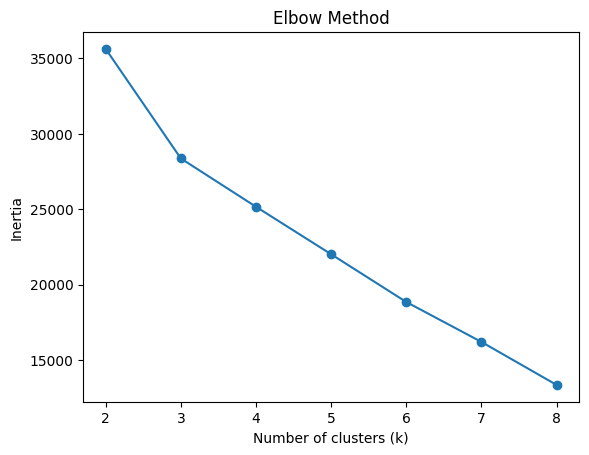

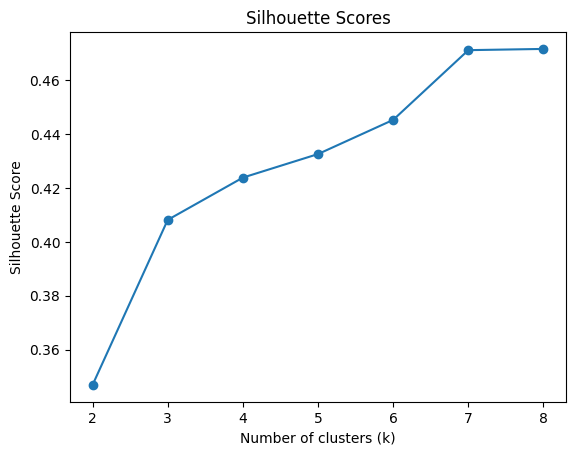

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(K_range), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

plt.plot(list(K_range), sil_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
best_k = 4

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

In [ ]:
df.groupby("Cluster").mean(numeric_only=True)

,Frequency,Monetary,Avg_Order_Value,Customer_Lifetime_Days,Purchase_Rate,Total_Items_Sold,Monetary_log,Total_Items_Sold_log,Attribution_Source_Direct,Attribution_Source_Google,Attribution_Source_Organic,Attribution_Source_Paid Ad,Attribution_Source_Referral,Customer_Type_new,Customer_Type_returning,Attribution_Source_Unknown
Cluster,,,,,,,,,,,,,,,,
0,2.056806,3.508585e+05,193802.910825,1279.438371,0.002573,83.903001,11.101199,2.097505,1.0,0.000000,0.000000,0.000000,0.0,0.998928,0.001072,0.856913
1,2.064516,4.215712e+05,157405.675947,555.432258,0.009022,58.658065,11.202628,1.920528,0.0,0.129032,0.793548,0.077419,0.0,0.780645,0.219355,0.000000
2,11.500945,2.368403e+06,320627.857739,1533.067108,0.008730,511.628544,13.159320,3.729729,1.0,0.000000,0.000000,0.000000,0.0,0.013233,0.986767,0.949905
3,2.139535,2.633893e+05,145859.883566,404.720930,0.009130,54.697674,11.557907,2.132914,0.0,0.000000,0.000000,0.000000,1.0,0.534884,0.465116,0.000000


In [ ]:
# Create a list of numeric columns you used for clustering
numeric_cols = [
    "Frequency", "Monetary_log", "Avg_Order_Value",
    "Customer_Lifetime_Days", "Purchase_Rate", "Total_Items_Sold_log"
]

# Calculate cluster means
cluster_summary = df.groupby("Cluster")[numeric_cols].mean().round(2)

# Add a count of customers in each cluster
cluster_summary["Customer_Count"] = df["Cluster"].value_counts().sort_index()

display(cluster_summary)

,Frequency,Monetary_log,Avg_Order_Value,Customer_Lifetime_Days,Purchase_Rate,Total_Items_Sold_log,Customer_Count
Cluster,,,,,,,
0,2.06,11.10,193802.91,1279.44,0.00,2.10,1866
1,2.06,11.20,157405.68,555.43,0.01,1.92,155
2,11.50,13.16,320627.86,1533.07,0.01,3.73,1058
3,2.14,11.56,145859.88,404.72,0.01,2.13,43


In [ ]:
df.columns

Index(['Customer_ID', 'Frequency', 'Monetary', 'Avg_Order_Value',
       'Customer_Lifetime_Days', 'Purchase_Rate', 'Attribution',
       'Total_Items_Sold', 'Monetary_log', 'Total_Items_Sold_log',
       'Attribution_Source_Direct', 'Attribution_Source_Google',
       'Attribution_Source_Organic', 'Attribution_Source_Paid Ad',
       'Attribution_Source_Referral', 'Customer_Type_new',
       'Customer_Type_returning', 'Cluster', 'Attribution_Source_Unknown'],
      dtype='object')

In [ ]:
# Step 1: Select numeric and one-hot encoded columns
numeric_cols = [
    "Frequency", "Monetary_log", "Avg_Order_Value",
    "Customer_Lifetime_Days", "Purchase_Rate", "Total_Items_Sold_log"
]

categorical_cols = [c for c in df.columns if c.startswith("Customer_Type_") or c.startswith("Attribution_Source_")]

# Step 2: Combine them
all_cols = numeric_cols + categorical_cols

# Step 3: Summarize by cluster
cluster_profile = df.groupby("Cluster")[all_cols].mean().round(2)

# Step 4: Add customer count
cluster_profile["Customer_Count"] = df["Cluster"].value_counts().sort_index()

display(cluster_profile)

,Frequency,Monetary_log,Avg_Order_Value,Customer_Lifetime_Days,Purchase_Rate,Total_Items_Sold_log,Attribution_Source_Direct,Attribution_Source_Google,Attribution_Source_Organic,Attribution_Source_Paid Ad,Attribution_Source_Referral,Customer_Type_new,Customer_Type_returning,Attribution_Source_Unknown,Customer_Count
Cluster,,,,,,,,,,,,,,,
0,2.06,11.10,193802.91,1279.44,0.00,2.10,1.0,0.00,0.00,0.00,0.0,1.00,0.00,0.86,1866
1,2.06,11.20,157405.68,555.43,0.01,1.92,0.0,0.13,0.79,0.08,0.0,0.78,0.22,0.00,155
2,11.50,13.16,320627.86,1533.07,0.01,3.73,1.0,0.00,0.00,0.00,0.0,0.01,0.99,0.95,1058
3,2.14,11.56,145859.88,404.72,0.01,2.13,0.0,0.00,0.00,0.00,1.0,0.53,0.47,0.00,43


In [ ]:
print(cluster_profile)

         Frequency  Monetary_log  Avg_Order_Value  Customer_Lifetime_Days  \
Cluster                                                                     
0             2.06         11.10        193802.91                 1279.44   
1             2.06         11.20        157405.68                  555.43   
2            11.50         13.16        320627.86                 1533.07   
3             2.14         11.56        145859.88                  404.72   

         Purchase_Rate  Total_Items_Sold_log  Attribution_Source_Direct  \
Cluster                                                                   
0                 0.00                  2.10                        1.0   
1                 0.01                  1.92                        0.0   
2                 0.01                  3.73                        1.0   
3                 0.01                  2.13                        0.0   

         Attribution_Source_Google  Attribution_Source_Organic  \
Cluster             

In [ ]:
import pandas as pd

def interpret_cluster_profiles(cluster_df):
    """
    Interpret cluster profiles and generate business insights
    """

    print("CLUSTER PROFILE ANALYSIS")
    print("=" * 80)

    # Analyze each cluster
    for cluster in cluster_df.index:
        print(f"\nCLUSTER {cluster} ANALYSIS:")
        print("-" * 50)

        # Get cluster data
        data = cluster_df.loc[cluster]

        # 1. Customer Base Analysis
        print(f"CUSTOMER BASE: {data['Customer_Count']} customers "
              f"({data['Customer_Count']/cluster_df['Customer_Count'].sum()*100:.1f}% of total)")

        # 2. Behavioral Analysis
        print(f"PURCHASE BEHAVIOR:")
        print(f"   - Frequency: {data['Frequency']} purchases")
        print(f"   - Avg Order Value: ${data['Avg_Order_Value']:.2f}")
        print(f"   - Purchase Rate: {data['Purchase_Rate']:.3f}")
        print(f"   - Total Items Sold: {data['Total_Items_Sold_log']:.2f} (log scale)")

        # 3. Customer Value & Lifetime
        print(f"CUSTOMER VALUE:")
        print(f"   - Lifetime: {data['Customer_Lifetime_Days']:.0f} days")
        print(f"   - Monetary Value: {data['Monetary_log']:.2f} (log scale)")
        print(f"   - Total Revenue: ${data['Avg_Order_Value']:,.0f}")

        # 4. Customer Type Analysis
        print(f"CUSTOMER TYPE:")
        print(f"   - New Customers: {data['Customer_Type_new']*100:.1f}%")
        print(f"   - Returning Customers: {data['Customer_Type_returning']*100:.1f}%")

        # 5. Acquisition Channel Analysis
        print(f"ACQUISITION CHANNELS:")
        channels = []
        if data['Attribution_Source_Direct'] > 0:
            channels.append(f"Direct ({data['Attribution_Source_Direct']*100:.0f}%)")
        if data['Attribution_Source_Google'] > 0:
            channels.append(f"Google ({data['Attribution_Source_Google']*100:.0f}%)")
        if data['Attribution_Source_Organic'] > 0:
            channels.append(f"Organic ({data['Attribution_Source_Organic']*100:.0f}%)")
        if data['Attribution_Source_Paid Ad'] > 0:
            channels.append(f"Paid Ads ({data['Attribution_Source_Paid Ad']*100:.0f}%)")
        if data['Attribution_Source_Referral'] > 0:
            channels.append(f"Referral ({data['Attribution_Source_Referral']*100:.0f}%)")
        if data['Attribution_Source_Unknown'] > 0:
            channels.append(f"Unknown ({data['Attribution_Source_Unknown']*100:.0f}%)")

        print(f"   - Primary Sources: {', '.join(channels)}")

    # Comparative Analysis
    print(f"\nCOMPARATIVE ANALYSIS")
    print("=" * 80)

    # Find best performing clusters
    highest_frequency = cluster_df['Frequency'].idxmax()
    highest_value = cluster_df['Avg_Order_Value'].idxmax()
    longest_lifetime = cluster_df['Customer_Lifetime_Days'].idxmax()
    most_customers = cluster_df['Customer_Count'].idxmax()
    highest_retention = cluster_df['Customer_Type_returning'].idxmax()

    print(f"TOP PERFORMERS:")
    print(f"   - Highest Frequency: Cluster {highest_frequency} ({cluster_df.loc[highest_frequency, 'Frequency']} purchases)")
    print(f"   - Highest Order Value: Cluster {highest_value} (${cluster_df.loc[highest_value, 'Avg_Order_Value']:.2f})")
    print(f"   - Longest Lifetime: Cluster {longest_lifetime} ({cluster_df.loc[longest_lifetime, 'Customer_Lifetime_Days']:.0f} days)")
    print(f"   - Most Customers: Cluster {most_customers} ({cluster_df.loc[most_customers, 'Customer_Count']} customers)")
    print(f"   - Highest Retention: Cluster {highest_retention} ({cluster_df.loc[highest_retention, 'Customer_Type_returning']*100:.1f}% returning)")

    # Generate Business Recommendations
    print(f"\nBUSINESS RECOMMENDATIONS")
    print("=" * 80)

    recommendations = []
    for cluster in cluster_df.index:
        data = cluster_df.loc[cluster]

        if cluster == 2:  # High-frequency cluster
            rec = f"Cluster {cluster}: PREMIUM/LOYAL CUSTOMERS - Focus on retention with VIP programs, exclusive offers, and loyalty rewards"
        elif data['Customer_Type_returning'] > 0.5:
            rec = f"Cluster {cluster}: RETURNING CUSTOMERS - Maintain relationship with personalized communication and cross-selling"
        elif data['Frequency'] < 3 and data['Customer_Lifetime_Days'] > 1000:
            rec = f"Cluster {cluster}: DORMANT HIGH-VALUE - Re-engage with win-back campaigns and special offers"
        elif data['Customer_Type_new'] > 0.7:
            rec = f"Cluster {cluster}: NEW CUSTOMERS - Focus on onboarding, education, and building first-purchase relationships"
        else:
            rec = f"Cluster {cluster}: MIXED PROFILE - Analyze further for targeted strategies"

        recommendations.append(rec)

    for rec in recommendations:
        print(f"   - {rec}")

    # Calculate Key Metrics
    print(f"\nKEY BUSINESS METRICS")
    print("=" * 80)

    total_customers = cluster_df['Customer_Count'].sum()
    total_revenue = cluster_df['Avg_Order_Value'].sum()
    avg_customer_lifetime = cluster_df['Customer_Lifetime_Days'].mean()
    overall_retention_rate = (cluster_df['Customer_Type_returning'] * cluster_df['Customer_Count']).sum() / total_customers

    print(f"   - Total Customers: {total_customers:,}")
    print(f"   - Total Revenue (across clusters): ${total_revenue:,.0f}")
    print(f"   - Average Customer Lifetime: {avg_customer_lifetime:.0f} days")
    print(f"   - Overall Retention Rate: {overall_retention_rate*100:.1f}%")

    # Channel Effectiveness
    print(f"\nCHANNEL EFFECTIVENESS ANALYSIS")
    print("=" * 80)

    for channel in ['Direct', 'Google', 'Organic', 'Paid Ad', 'Referral', 'Unknown']:
        col_name = f'Attribution_Source_{channel}'
        if col_name in cluster_df.columns:
            channel_customers = (cluster_df[col_name] * cluster_df['Customer_Count']).sum()
            if channel_customers > 0:
                print(f"   - {channel}: {channel_customers:.0f} customers ({(channel_customers/total_customers)*100:.1f}%)")

# Run the interpretation with your cluster_profile data
interpret_cluster_profiles(cluster_profile)

CLUSTER PROFILE ANALYSIS

CLUSTER 0 ANALYSIS:
--------------------------------------------------
CUSTOMER BASE: 1866.0 customers (59.8% of total)
PURCHASE BEHAVIOR:
   - Frequency: 2.06 purchases
   - Avg Order Value: $193802.91
   - Purchase Rate: 0.000
   - Total Items Sold: 2.10 (log scale)
CUSTOMER VALUE:
   - Lifetime: 1279 days
   - Monetary Value: 11.10 (log scale)
   - Total Revenue: $193,803
CUSTOMER TYPE:
   - New Customers: 100.0%
   - Returning Customers: 0.0%
ACQUISITION CHANNELS:
   - Primary Sources: Direct (100%), Unknown (86%)

CLUSTER 1 ANALYSIS:
--------------------------------------------------
CUSTOMER BASE: 155.0 customers (5.0% of total)
PURCHASE BEHAVIOR:
   - Frequency: 2.06 purchases
   - Avg Order Value: $157405.68
   - Purchase Rate: 0.010
   - Total Items Sold: 1.92 (log scale)
CUSTOMER VALUE:
   - Lifetime: 555 days
   - Monetary Value: 11.20 (log scale)
   - Total Revenue: $157,406
CUSTOMER TYPE:
   - New Customers: 78.0%
   - Returning Customers: 22.0%
A